# Descripción del proyecto

Trabajas para la tienda online Ice que vende videojuegos por todo el mundo. Las reseñas de usuarios y expertos, los géneros, las plataformas (por ejemplo, Xbox o PlayStation) y los datos históricos sobre las ventas de juegos están disponibles en fuentes abiertas. Tienes que identificar patrones que determinen si un juego tiene éxito o no. Esto te permitirá detectar proyectos prometedores y planificar campañas publicitarias.

Delante de ti hay datos que se remontan a 2016. Imaginemos que es diciembre de 2016 y estás planeando una campaña para 2017.

Lo importante es adquirir experiencia de trabajo con datos. Realmente no importa si estás pronosticando las ventas de 2017 en función de los datos de 2016 o las ventas de 2027 en función de los datos de 2026.

El dataset contiene una columna "rating" que almacena la clasificación ESRB de cada juego. El Entertainment Software Rating Board (la Junta de clasificación de software de entretenimiento) evalúa el contenido de un juego y asigna una clasificación de edad como Adolescente o Adulto.

# Inicialización

In [1]:
# Cargar todas las librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math as mt
from math import factorial
from scipy import stats as st

## Cargar datos

In [2]:
df_g = pd.read_csv('/datasets/games.csv')

## Preparación de datos 

In [3]:
df_g.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [4]:
df_g.sample(5)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
9284,Rio,PS3,2011.0,Misc,0.04,0.07,0.00,0.02,65.0,tbd,E10+
3295,Ganbaru Watashi no Kakei Diary,DS,2007.0,Misc,0.00,0.00,0.61,0.00,NaN,NaN,NaN
2425,Dynasty Warriors 4: Xtreme Legends,PS2,2003.0,Action,0.17,0.13,0.51,0.04,72.0,9.1,T
1790,Commando,NES,1986.0,Action,0.71,0.16,0.25,0.03,NaN,NaN,NaN
5388,Rayman Legends,XOne,2014.0,Platform,0.13,0.18,0.00,0.03,91.0,7.9,E10+


In [5]:
df_row = df_g.iloc[0]
print(df_row)

Name               Wii Sports
Platform                  Wii
Year_of_Release        2006.0
Genre                  Sports
NA_sales                41.36
EU_sales                28.96
JP_sales                 3.77
Other_sales              8.45
Critic_Score             76.0
User_Score                  8
Rating                      E
Name: 0, dtype: object


In [6]:
df_g.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


En el siguiente dataframe se realiza la exploración de sus valores, por consiguiente, se realizan las siguientes observaciones:

Columna, observación. En su conjunto, se debe revisar que no se repitan valores.

'Name': La columna es de tipo obj, al ser el nombre de los videojuegos es comprensible que sean de este tipo obj. Puesto que solo faltan 2 valores con NA, se revisarán estos rows para observar si lo podemos eliminar o le colocamos un valor simbólico, como 'UNKNOWN'.

'Platform': Es de tipo obj, al ser el nombre de las plataformas, presenta 'no inconvenientes' este tipo obj. Observamos además que cuenta con todos sus valores llenos, por los que solo se debería revisar la repetición correcta de nombres, pues su valor fácilmente es interpretable como catégorico.

'Year_of_Release': Es de tipo float64, con la descripción del método se observa que pese a que está en float tanto el mínimo como máximo (De igual forma sus percentiles) son valores enteros, lo cual nos da pauta para buscar la conversión de esta columna a int64. En esta columna hay 269 sin valor, por lo que se propone cambiar estos valores a 0 y no tomarlos en cuenta.

'Genre': Es de tipo obj, al ser el nombre del género de cada videojuego presenta 'no inconvenientes' mantenerlo en este tipo obj. Puesto que solo le faltan 2 valores, se debe revisar estos renglones para observar si se pueden eliminar. También revisar la repetición correcta de nombres, en caso de que la categoría se repita bajo diferentes nombres.

'NA_sales': Es de tipo float64, al ser el valor en millones de ventas presenta 'no inconvenientes' mantenerlo en este tipo float64. Puesto que todos los valores están llenos, podemos asumir que solo necesitamos revisar estos valores, ordenandolos y revisando que sean valores flotantes.

'EU_sales': Es de tipo float64, al ser el valor en millones de ventas presenta 'no inconvenientes' mantenerlo en este tipo float64. Puesto que todos los valores están llenos, podemos asumir que solo necesitamos revisar estos valores, ordenandolos y revisando que sean valores flotantes.

'JP_sales': Es de tipo float64, al ser el valor en millones de ventas presenta 'no inconvenientes' mantenerlo en este tipo float64. Puesto que todos los valores están llenos, podemos asumir que solo necesitamos revisar estos valores, ordenandolos y revisando que sean valores flotantes.

'Other_sales': Es de tipo float64, al ser el valor en millones de ventas presenta 'no inconvenientes' mantenerlo en este tipo float64. Puesto que todos los valores están llenos, podemos asumir que solo necesitamos ordenar y revisar que sean valores flotantes.

'Critic_Score': Es de tipo float64, al ser el valor que los criticos han dado a cada videojuego, al revisar la descripción del dataframe se observa que podríamos cambiar el tipo de float64 a int64, a razón de que el puntaje es de número entero sobre con un máximo de 100. Se observa que hay demasiados valores vacíos (8578), por consiguiente, los análisis que se realicen será sin tomar en cuenta estos renglones. Tomando en cuenta está columna como no tan representativa. Y además se colocará un 0 en lugar de los valores NaN.

'User_Score': Es de tipo obj, al ser el valor que los usuarios han dado a cada videojuego, se debe de cambiar el tipo de obj a float, puesto que el puntaje es de número flotante sobre un máximo de 10. Se observa que hay valores vacíos que para su análisis se colocará un 0 en lugar de los valores NaN.

'Rating': Es de tipo obj, al ser el valor en letra de la categoría se decide dejar como tipo obj. Sin embargo, para gestionar los valores vacíos (6766) se colocará un valor simbólico como 'UNKNOWN'. 


Conclusiones generales:
- Hay 2 renglones con NA en las columnas 'Name' y 'Genre', que podrían estar relacionadas o ser las mismas.
- Se debe de revisar que no haya valores duplicados en el dataframe.
- Revisar si los valores en 'Name', 'Platform', 'Genre', 'Rating' se repitan correctamente en el caso de que los nombres se repitan bajo diferentes nombres.
- Cambiar el tipo de dato en 'Year_of_Release', 'Critic_Score' a int.
- cambiar a NaN los valores como 'tbd' 'User_Score'  y convertir a float.
- Colocar los valores NaN en 'Year_of_Release', 'Critic_Score', 'User_Score' a 0.
- Colocar los valores NaN en 'Name','Genre', 'Rating' a 'UNKNOWN'.


In [7]:
df_g.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Revisar valores duplicados.

In [8]:
print('Número de filas duplicadas: ', df_g.duplicated().sum())

Número de filas duplicadas:  0


Colocar los nombres de las columnas en minúsculas.

In [9]:
print(df_g.columns)

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')


In [10]:
nm = []
for old in df_g.columns:
    new = old.lower()
    nm.append(new)
df_g.columns = nm
print(df_g.columns)

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


Revisar los 2 renglones con NA en las columnas 'Name' y 'Genre', que podrían estar relacionadas o ser las mismas.

In [11]:
print(df_g[df_g['name'].isna()])

      name platform  year_of_release genre  na_sales  eu_sales  jp_sales  \
659    NaN      GEN           1993.0   NaN      1.78      0.53      0.00   
14244  NaN      GEN           1993.0   NaN      0.00      0.00      0.03   

       other_sales  critic_score user_score rating  
659           0.08           NaN        NaN    NaN  
14244         0.00           NaN        NaN    NaN  


In [12]:
#print(df_g[(df_g['year_of_release'] == 1993) & (df_g['platform'] == 'GEN')])
print(df_g[(df_g['platform'] == 'GEN')])

                                                    name platform  \
145                                 Sonic the Hedgehog 2      GEN   
257                                   Sonic the Hedgehog      GEN   
564                                        Mortal Kombat      GEN   
588                                      Streets of Rage      GEN   
659                                                  NaN      GEN   
832                                              NBA Jam      GEN   
960                                     Sonic & Knuckles      GEN   
996                                 Sonic the Hedgehog 3      GEN   
1099        Street Fighter II': Special Champion Edition      GEN   
1365                              Disney's The Lion King      GEN   
1453                                     Mortal Kombat 3      GEN   
1842                          NBA Jam Tournament Edition      GEN   
6451                                       Virtua Racing      GEN   
7885                              

Puesto que no se puede recuperar el nombre de los juegos ni el género se eliminan estas filas.

In [13]:
df_g = df_g.dropna(subset = ['name'])
df_g.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


Revisar si los valores en 'name', 'platform', 'genre', 'rating' se repitan correctamente en el caso de que los nombres se repitan bajo diferentes nombres.

In [14]:
column_name_num = df_g['name'].sort_values().nunique()
print(column_name_num)

11559


In [15]:
dup_n = df_g['name'].duplicated().sum()
print(dup_n)

5154


La columna 'name' cuenta con muchos valores únicos, y valores repetidos, lo que nos podría decir acerca de los videojuegos que pueden estar en varias plataformas o en diferentes años, hablando de videojuegos con relanzamientos.

In [16]:
column_platform_num = df_g['platform'].sort_values().nunique()
print(column_platform_num)

31


In [17]:
dup_p = df_g['platform'].duplicated().sum()
print(dup_p)

16682


In [18]:
print(df_g['platform'].sort_values().unique())

['2600' '3DO' '3DS' 'DC' 'DS' 'GB' 'GBA' 'GC' 'GEN' 'GG' 'N64' 'NES' 'NG'
 'PC' 'PCFX' 'PS' 'PS2' 'PS3' 'PS4' 'PSP' 'PSV' 'SAT' 'SCD' 'SNES' 'TG16'
 'WS' 'Wii' 'WiiU' 'X360' 'XB' 'XOne']


La columna 'platform' cuenta con 31 valores únicos y ninguno está escrito de forma incorrecta, por lo tanto no se debe realizar cambios.

In [19]:
column_rating_num = df_g['rating'].sort_values().nunique()
print(column_rating_num)

8


In [20]:
print(df_g['rating'].sort_values().unique())

['AO' 'E' 'E10+' 'EC' 'K-A' 'M' 'RP' 'T' nan]


La columna 'rating' cuenta con 8 valores únicos, y al observar que uno de esos valores un un valor nan, se cambiará ese valor por la categoría 'UNKNOWN'.

In [21]:
df_g['rating'].fillna('unknown', inplace = True)
df_g.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           16713 non-null  object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


Cambiar a NaN los valores como 'tbd' en 'user_score' y colocarlos valores NaN con un valor determinado (0.01).

In [22]:
print(df_g['user_score'].sort_values().unique())

['0' '0.2' '0.3' '0.5' '0.6' '0.7' '0.9' '1' '1.1' '1.2' '1.3' '1.4' '1.5'
 '1.6' '1.7' '1.8' '1.9' '2' '2.1' '2.2' '2.3' '2.4' '2.5' '2.6' '2.7'
 '2.8' '2.9' '3' '3.1' '3.2' '3.3' '3.4' '3.5' '3.6' '3.7' '3.8' '3.9' '4'
 '4.1' '4.2' '4.3' '4.4' '4.5' '4.6' '4.7' '4.8' '4.9' '5' '5.1' '5.2'
 '5.3' '5.4' '5.5' '5.6' '5.7' '5.8' '5.9' '6' '6.1' '6.2' '6.3' '6.4'
 '6.5' '6.6' '6.7' '6.8' '6.9' '7' '7.1' '7.2' '7.3' '7.4' '7.5' '7.6'
 '7.7' '7.8' '7.9' '8' '8.1' '8.2' '8.3' '8.4' '8.5' '8.6' '8.7' '8.8'
 '8.9' '9' '9.1' '9.2' '9.3' '9.4' '9.5' '9.6' '9.7' 'tbd' nan]


In [23]:
df_g['user_score'] = df_g['user_score'].replace('tbd', np.nan)

In [24]:
print(df_g['user_score'].sort_values().unique())

['0' '0.2' '0.3' '0.5' '0.6' '0.7' '0.9' '1' '1.1' '1.2' '1.3' '1.4' '1.5'
 '1.6' '1.7' '1.8' '1.9' '2' '2.1' '2.2' '2.3' '2.4' '2.5' '2.6' '2.7'
 '2.8' '2.9' '3' '3.1' '3.2' '3.3' '3.4' '3.5' '3.6' '3.7' '3.8' '3.9' '4'
 '4.1' '4.2' '4.3' '4.4' '4.5' '4.6' '4.7' '4.8' '4.9' '5' '5.1' '5.2'
 '5.3' '5.4' '5.5' '5.6' '5.7' '5.8' '5.9' '6' '6.1' '6.2' '6.3' '6.4'
 '6.5' '6.6' '6.7' '6.8' '6.9' '7' '7.1' '7.2' '7.3' '7.4' '7.5' '7.6'
 '7.7' '7.8' '7.9' '8' '8.1' '8.2' '8.3' '8.4' '8.5' '8.6' '8.7' '8.8'
 '8.9' '9' '9.1' '9.2' '9.3' '9.4' '9.5' '9.6' '9.7' nan]


In [25]:
df_g['user_score'].fillna(0.01, inplace = True)

Cambiar el tipo de dato en 'year_of_release' y 'critic_score'a int.

In [26]:
print(df_g['critic_score'].sort_values().unique())

[13. 17. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34.
 35. 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52.
 53. 54. 55. 56. 57. 58. 59. 60. 61. 62. 63. 64. 65. 66. 67. 68. 69. 70.
 71. 72. 73. 74. 75. 76. 77. 78. 79. 80. 81. 82. 83. 84. 85. 86. 87. 88.
 89. 90. 91. 92. 93. 94. 95. 96. 97. 98. nan]


In [27]:
df_g['year_of_release'].fillna(0, inplace = True)
df_g['year_of_release'] = df_g['year_of_release'].astype('int')
df_g['critic_score'].fillna(0, inplace = True)
df_g['critic_score'] = df_g['critic_score'].astype('int')
df_g['user_score'] = df_g['user_score'].astype('float')

In [28]:
df_g.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  int64  
 9   user_score       16713 non-null  float64
 10  rating           16713 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.5+ MB


En último lugar, se añadirán algunas columnas que serán útiles para el análisis. 

Columna con los valores de ventas totales.

In [29]:
df_g['ventas_totales'] = df_g['na_sales'] + df_g['eu_sales'] + df_g['jp_sales'] + df_g['other_sales']
print(df_g.iloc[0])

name               Wii Sports
platform                  Wii
year_of_release          2006
genre                  Sports
na_sales                41.36
eu_sales                28.96
jp_sales                 3.77
other_sales              8.45
critic_score               76
user_score                8.0
rating                      E
ventas_totales          82.54
Name: 0, dtype: object


# Analisis de datos

Se realiza las siguientes actividades para pautar el análisis:
- Mira cuántos juegos fueron lanzados en diferentes años ¿Son significativos los datos de cada periodo?
- Observa cómo varían las ventas de una plataforma a otra. Elige las plataformas con las mayores ventas totales y construye una distribución basada en los datos de cada año. Busca las plataformas que solían ser populares pero que ahora no tienen ventas. ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?
- Determina para qué periodo debes tomar datos. Para hacerlo mira tus respuestas a las preguntas anteriores. Los datos deberían permitirte construir un modelo para 2017.
- Trabaja solo con los datos que consideras relevantes. Ignora los datos anteriores.
- ¿Qué plataformas son líderes en ventas? ¿Cuáles crecen y cuáles se reducen? Elige varias plataformas potencialmente rentables.
- Crea un diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma. ¿Son significativas las diferencias en las ventas? ¿Qué sucede con las ventas promedio en varias plataformas? Describe tus hallazgos.

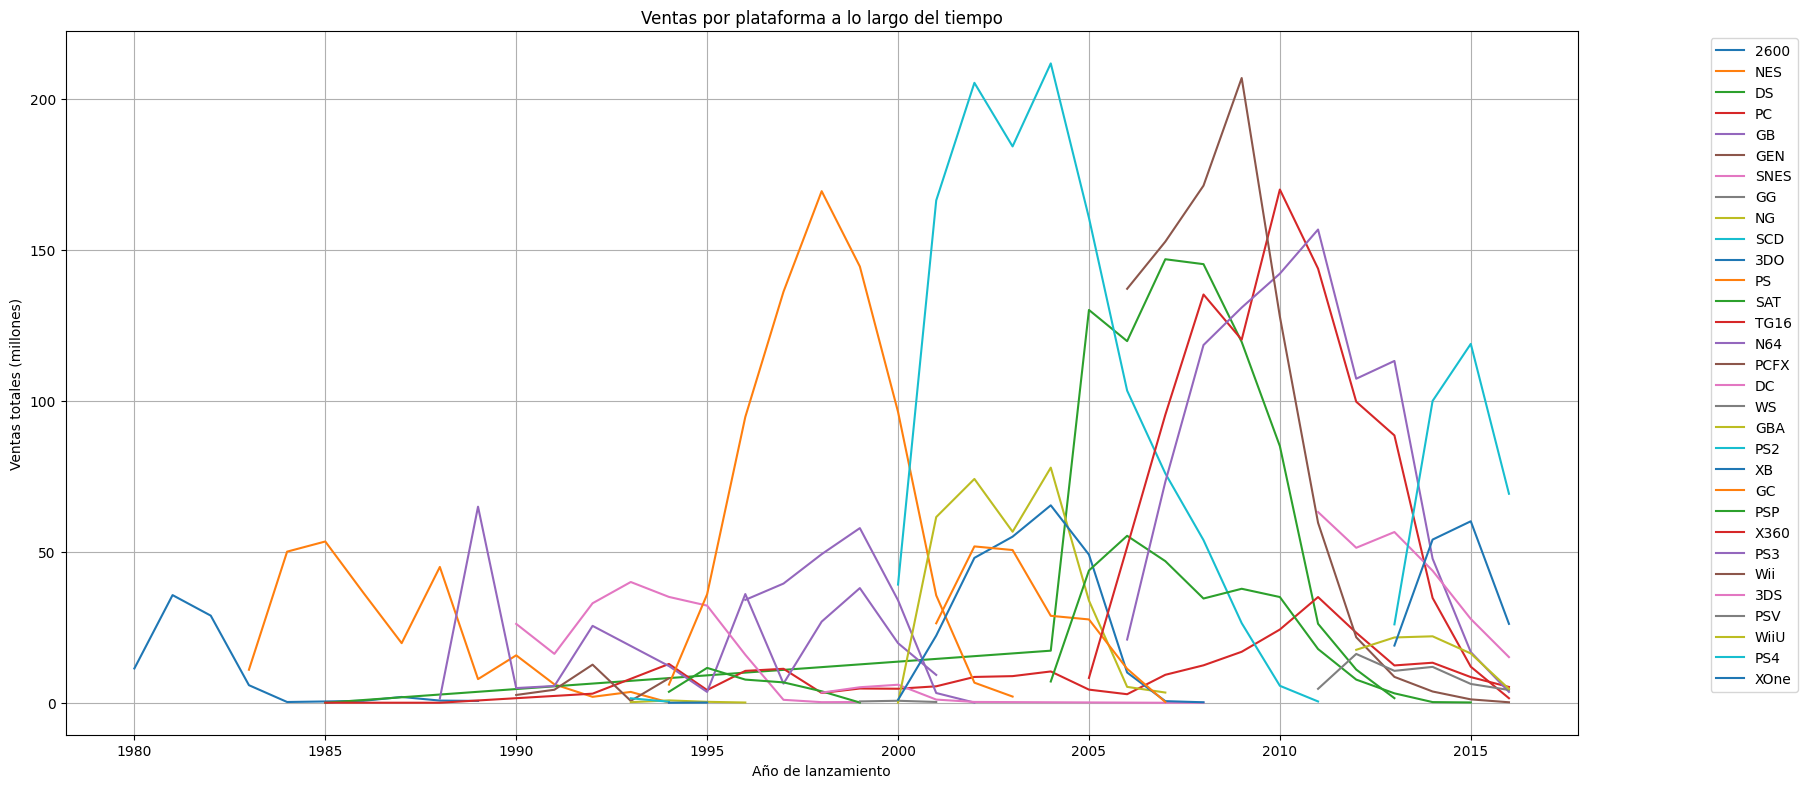

In [30]:
games_per_year = df_g.groupby(['year_of_release'])['name'].count()
#print(games_per_year)
#gpy = games_per_year.reset_index()
#print(gpy)
ventas_por_anio= df_g[df_g['year_of_release'] !=0]
ventas_por_anio_plataforma = ventas_por_anio.groupby(['year_of_release', 'platform'])['ventas_totales'].sum().reset_index()

# Creamos la figura
plt.figure(figsize=(18, 8))

# Iteramos sobre cada plataforma
for platform in ventas_por_anio_plataforma['platform'].unique():
    data_platform = ventas_por_anio_plataforma[ventas_por_anio_plataforma['platform'] == platform]
    plt.plot(data_platform['year_of_release'], data_platform['ventas_totales'], label=platform)

# Etiquetas y estilo
plt.title("Ventas por plataforma a lo largo del tiempo")
plt.xlabel("Año de lanzamiento")
plt.ylabel("Ventas totales (millones)")
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
plt.grid(True)
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Solamente te recomiendo realizar una gráfica para complementar este análisis

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Gran trabajo con el ajuste!

In [31]:
total_per_platform = df_g.groupby(['year_of_release','platform'])['ventas_totales'].sum()
df_tpp = total_per_platform.reset_index()
df_tpp = df_tpp[df_tpp['year_of_release'] !=0]
print(df_tpp)
print()
print(df_tpp.groupby(['platform'])['ventas_totales'].sum().sort_values())

     year_of_release platform  ventas_totales
16              1980     2600           11.38
17              1981     2600           35.68
18              1982     2600           28.88
19              1983     2600            5.84
20              1983      NES           10.96
..               ...      ...             ...
249             2016      PSV            4.25
250             2016      Wii            0.18
251             2016     WiiU            4.60
252             2016     X360            1.52
253             2016     XOne           26.15

[238 rows x 3 columns]

platform
PCFX       0.03
GG         0.04
3DO        0.10
TG16       0.16
WS         1.42
NG         1.44
SCD        1.86
DC        15.95
GEN       28.35
SAT       33.59
PSV       53.81
WiiU      82.19
2600      86.48
XOne     159.32
GC       196.73
SNES     200.04
N64      218.01
NES      251.05
XB       251.57
GB       254.43
PC       255.76
3DS      257.81
PSP      289.53
GBA      312.88
PS4      314.14
PS       727.5

Del la organización de número de videojuegos por año podemos observar 4 periodos:
- 80 a 93, el número de videojuegos es apenas de 2 dígitos.
- 94 a 05, el número de videojuegos es de 3 dígitos.
- 06 a 11, el número de videojuegos es de 4 dígitos, el mayor periodo de lanzamiento.
- 12 a 16, el número de videojuegos regresa a 3 dígitos.

Puesto que nos interesan los videojuegos con ganancias altas, separaremos el dataframe en dos:
- Plataformas con menos de 100 millones
- Plataformas con más de 100 millones

In [32]:
#En primer lugar, se obtienen las ventas totales por plataforma
ventas_por_plataforma = df_tpp.groupby('platform')['ventas_totales'].sum()

#En segundo lugar, se obtienen las plataformas con mas y con menos de 100 millones en ventas
plataformas_con_mas_de_100 = ventas_por_plataforma[ventas_por_plataforma >= 100].index
plataformas_con_menos_de_100 = ventas_por_plataforma[ventas_por_plataforma < 100].index

#Finalmente, se crean los dataframes con los respectivos videojuegos.
df_con_mas = df_tpp[df_tpp['platform'].isin(plataformas_con_mas_de_100)]
df_con_menos = df_tpp[df_tpp['platform'].isin(plataformas_con_menos_de_100)]
 

Antes de pasar al análisis, se obtendrá el valor de duración de cada plataforma.

In [33]:
# Agrupar por plataforma y obtener primer y último año
actividad_plataformas = df_tpp.groupby('platform')['year_of_release'].agg(
    primera_venta='min',
    ultima_venta='max'
)
# Calcular duración en años
actividad_plataformas['duracion'] = actividad_plataformas['ultima_venta'] - actividad_plataformas['primera_venta'] + 1

# Mostrar resultado
#print(actividad_plataformas.sort_values(by='duracion', ascending=False))
print(actividad_plataformas)

          primera_venta  ultima_venta  duracion
platform                                       
2600               1980          1989        10
3DO                1994          1995         2
3DS                2011          2016         6
DC                 1998          2008        11
DS                 1985          2013        29
GB                 1988          2001        14
GBA                2000          2007         8
GC                 2001          2007         7
GEN                1990          1994         5
GG                 1992          1992         1
N64                1996          2002         7
NES                1983          1994        12
NG                 1993          1996         4
PC                 1985          2016        32
PCFX               1996          1996         1
PS                 1994          2003        10
PS2                2000          2011        12
PS3                2006          2016        11
PS4                2013          2016   

En primer lugar se añalizan las plataformas que tuvieron ventas antes de 2003, 2006, 2009, 2012 y 2015 pero que no tuvieron ventas después de dicho año.

In [34]:
# Lista de años objetivo
anios = [2003, 2006, 2009, 2012, 2015]

# Conjunto acumulado de plataformas ya contadas
plataformas_acumuladas = set()

# Crear variables dinámicas para cada año
for anio in anios:
    plataformas_antes = df_con_mas[df_con_mas['year_of_release'] < anio]['platform'].unique()
    plataformas_despues = df_con_mas[df_con_mas['year_of_release'] >= anio]['platform'].unique()

    obsoletas = np.setdiff1d(plataformas_antes, plataformas_despues)
    nuevas_obsoletas = [p for p in obsoletas if p not in plataformas_acumuladas]

    # Guardar en una variable con nombre dinámico
    var_name = f"plataformas_obsoletas_desde_{anio}" 
    globals()[var_name] = nuevas_obsoletas

    # Actualizar el conjunto acumulado
    plataformas_acumuladas.update(nuevas_obsoletas)

# Puedes probar accediendo a las variables así:
print(plataformas_obsoletas_desde_2003)
print(plataformas_obsoletas_desde_2006)
print(plataformas_obsoletas_desde_2009)
print(plataformas_obsoletas_desde_2012)
print(plataformas_obsoletas_desde_2015)


['GB', 'N64', 'NES', 'SNES']
['PS']
['GBA', 'GC', 'XB']
['PS2']
['DS']


In [35]:
plataformas_all = actividad_plataformas.reset_index()
plat_ob = []
#print(plataformas_all)
print('Plataformas obsoletas desde 2003 (Plataforma y duración):')
for plataforma in plataformas_obsoletas_desde_2003:
    print(plataformas_all[plataformas_all['platform'] == plataforma])
    plat_ob.append(plataforma)
print() #
print('Plataformas obsoletas desde 2006 (Plataforma y duración):')
for plataforma in plataformas_obsoletas_desde_2006:
    print(plataformas_all[plataformas_all['platform'] == plataforma])
    plat_ob.append(plataforma)
print() #
print('Plataformas obsoletas desde 2009 (Plataforma y duración):')
for plataforma in plataformas_obsoletas_desde_2009:
    print(plataformas_all[plataformas_all['platform'] == plataforma])
    plat_ob.append(plataforma)
print() #
print('Plataformas obsoletas desde 2012 (Plataforma y duración):')
for plataforma in plataformas_obsoletas_desde_2012:
    print(plataformas_all[plataformas_all['platform'] == plataforma])
    plat_ob.append(plataforma)
print() #
print('Plataformas obsoletas desde 2015 (Plataforma y duración):')
for plataforma in plataformas_obsoletas_desde_2015:
    print(plataformas_all[plataformas_all['platform'] == plataforma])
    plat_ob.append(plataforma)
print()
print(plat_ob)

Plataformas obsoletas desde 2003 (Plataforma y duración):
  platform  primera_venta  ultima_venta  duracion
5       GB           1988          2001        14
   platform  primera_venta  ultima_venta  duracion
10      N64           1996          2002         7
   platform  primera_venta  ultima_venta  duracion
11      NES           1983          1994        12
   platform  primera_venta  ultima_venta  duracion
23     SNES           1990          1999        10

Plataformas obsoletas desde 2006 (Plataforma y duración):
   platform  primera_venta  ultima_venta  duracion
15       PS           1994          2003        10

Plataformas obsoletas desde 2009 (Plataforma y duración):
  platform  primera_venta  ultima_venta  duracion
6      GBA           2000          2007         8
  platform  primera_venta  ultima_venta  duracion
7       GC           2001          2007         7
   platform  primera_venta  ultima_venta  duracion
29       XB           2000          2008         9

Plataformas o

In [36]:
#hacer un df sin las plataformas obsoletas
df_no_obs = df_con_mas[~df_con_mas['platform'].isin(plat_ob)]
df_no_obs_platform = df_no_obs['platform'].unique()
for platform in df_no_obs_platform:
    print(plataformas_all[plataformas_all['platform'] == platform])
print(df_no_obs_platform)

   platform  primera_venta  ultima_venta  duracion
13       PC           1985          2016        32
   platform  primera_venta  ultima_venta  duracion
19      PSP           2004          2015        12
   platform  primera_venta  ultima_venta  duracion
28     X360           2005          2016        12
   platform  primera_venta  ultima_venta  duracion
17      PS3           2006          2016        11
   platform  primera_venta  ultima_venta  duracion
26      Wii           2006          2016        11
  platform  primera_venta  ultima_venta  duracion
2      3DS           2011          2016         6
   platform  primera_venta  ultima_venta  duracion
18      PS4           2013          2016         4
   platform  primera_venta  ultima_venta  duracion
30     XOne           2013          2016         4
['PC' 'PSP' 'X360' 'PS3' 'Wii' '3DS' 'PS4' 'XOne']


In [37]:
#print(df_no_obs_platform)

Se observa la evolución de las plataformas que han dejado más de 100 millones de ventas en total, lo cual nos permite analizar su evolución a lo largo del tiempo, en total se registran 10 plataformas importantes. Nos permite responder las siguientes preguntas planteadas:
- ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?

Plataformas antiguas(2003 a 2015):
- GB: 14 años
- N64: 7 años
- NES: 12 años
- SNES: 10 años
- PS: 10 años
- GBA: 8 años
- GC: 7 años
- XB: 9 años
- PS2: 12 años
- DS: 29 años

Plataformas recientes(2015 en adelante):
- PC: 32 años
- PSP: 12 años
- X360: 12 años
- PS3: 11 años
- Wii: 11 años
- 3DS: 6 años
- PS4: 4 años
- XOne: 4 años

In [38]:
df_ob = plataformas_all[plataformas_all['platform'].isin(plat_ob)]
df_ob_no = plataformas_all[plataformas_all['platform'].isin(df_no_obs_platform)]    

In [39]:
print(df_ob)
print()
print(df_ob_no)

   platform  primera_venta  ultima_venta  duracion
4        DS           1985          2013        29
5        GB           1988          2001        14
6       GBA           2000          2007         8
7        GC           2001          2007         7
10      N64           1996          2002         7
11      NES           1983          1994        12
15       PS           1994          2003        10
16      PS2           2000          2011        12
23     SNES           1990          1999        10
29       XB           2000          2008         9

   platform  primera_venta  ultima_venta  duracion
2       3DS           2011          2016         6
13       PC           1985          2016        32
17      PS3           2006          2016        11
18      PS4           2013          2016         4
19      PSP           2004          2015        12
26      Wii           2006          2016        11
28     X360           2005          2016        12
30     XOne           2013    

In [40]:
df_ob.describe()

,primera_venta,ultima_venta,duracion
count,10.000000,10.000000,10.000000
mean,1993.700000,2004.500000,11.800000
std,6.783149,5.778312,6.460134
min,1983.000000,1994.000000,7.000000
25%,1988.500000,2001.250000,8.250000
50%,1995.000000,2005.000000,10.000000
75%,2000.000000,2007.750000,12.000000
max,2001.000000,2013.000000,29.000000


In [41]:
df_ob_no.describe()

,primera_venta,ultima_venta,duracion
count,8.000000,8.000000,8.000000
mean,2005.375000,2015.875000,11.500000
std,8.991067,0.353553,8.976159
min,1985.000000,2015.000000,4.000000
25%,2004.750000,2016.000000,5.500000
50%,2006.000000,2016.000000,11.000000
75%,2011.500000,2016.000000,12.000000
max,2013.000000,2016.000000,32.000000


Del análisis estadístico se observa que hay una gran diferencia entre la mediana de ambos grupos de plataformas (obsoletas y actuales), nos intera la duración de las plataformas actuales por lo que se debe mencionar que tienen una duración media de 11 años antes de descontinuarse (Relativamente similar a su mediana), y un valor mínimo de 4 años, contra 7 años con las plataformas obsoletas.

Se tomaran estos datos para realizar los análisis posteriores.

In [42]:
print(df_con_mas)

     year_of_release platform  ventas_totales
20              1983      NES           10.96
22              1984      NES           50.08
24              1985       DS            0.02
25              1985      NES           53.44
26              1985       PC            0.04
..               ...      ...             ...
247             2016      PS3            3.60
248             2016      PS4           69.25
250             2016      Wii            0.18
252             2016     X360            1.52
253             2016     XOne           26.15

[185 rows x 3 columns]


In [43]:
df_lideres = df_con_mas[df_con_mas['platform'].isin(df_no_obs_platform)]
print(df_lideres)

     year_of_release platform  ventas_totales
26              1985       PC            0.04
34              1988       PC            0.03
50              1992       PC            3.03
62              1994       PC           12.87
70              1995       PC            4.22
..               ...      ...             ...
247             2016      PS3            3.60
248             2016      PS4           69.25
250             2016      Wii            0.18
252             2016     X360            1.52
253             2016     XOne           26.15

[86 rows x 3 columns]


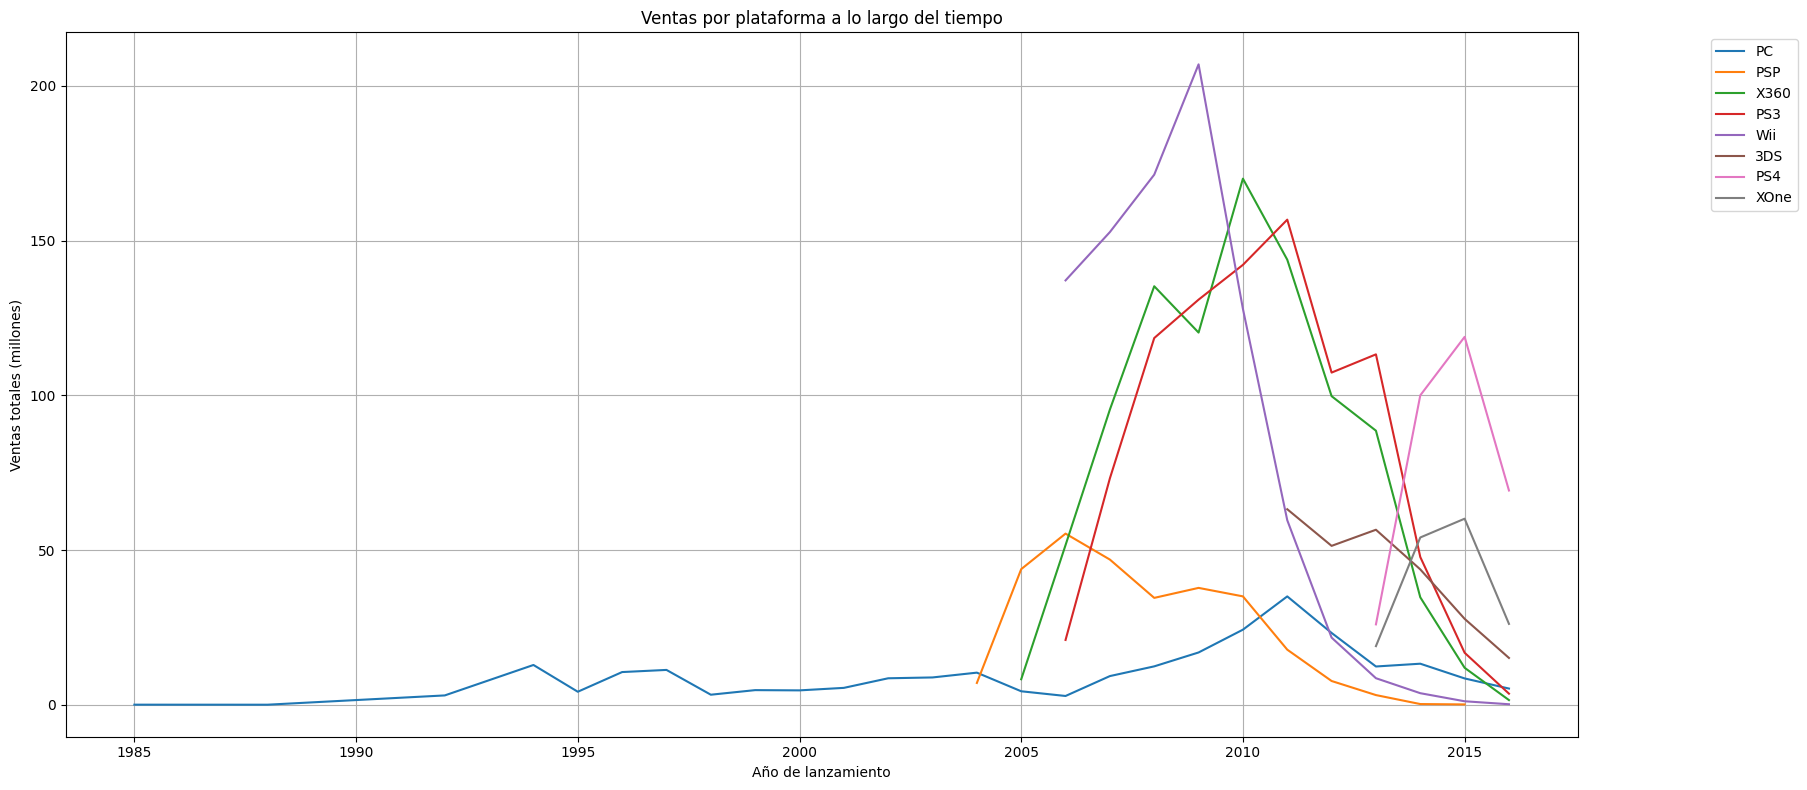

In [44]:
plt.figure(figsize=(18, 8))
for platform in df_lideres['platform'].unique():
    platform_data = df_lideres[df_lideres['platform'] == platform]
    plt.plot(platform_data['year_of_release'], platform_data['ventas_totales'], label=platform)

plt.title("Ventas por plataforma a lo largo del tiempo")
plt.xlabel("Año de lanzamiento")
plt.ylabel("Ventas totales (millones)")
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
plt.grid(True)
plt.tight_layout()
plt.show()

¿Qué plataformas son líderes en ventas? ¿Cuáles crecen y cuáles se reducen? Elige varias plataformas potencialmente rentables.

Al analizar las ventas por plataforma a lo largo del tiempo, se observa una tendencia creciente en torno al año 2005 impulsada por tres plataformas principales: Xbox 360 (X360), Wii y PlayStation 3 (PS3). Estas plataformas experimentaron un ciclo de vida promedio de aproximadamente 11 años, tras el cual comenzaron a mostrar una disminución significativa en ventas hacia el año 2016, lo que sugiere un proceso de obsolescencia gradual.

Por otro lado, las plataformas PlayStation 4 (PS4) y Xbox One (XOne) alcanzaron su punto máximo de ventas alrededor de 2015, aunque lograron mantenerse con volúmenes altos por al menos uno o dos años más, lo que indica un ciclo de vida más prolongado o una transición más lenta hacia nuevas generaciones.

Un caso particular es el de los juegos en PC, que, a pesar de no generar cifras de ventas tan altas como las consolas, han mantenido una presencia constante en el mercado sin superar los 10 millones dolares por año. Esto refleja un nicho más estable pero menos explosivo, posiblemente sustentado por una base de usuarios fieles y la ausencia de una necesidad de renovación de "plataforma" como ocurre con las consolas.

Crea un diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma. ¿Son significativas las diferencias en las ventas? ¿Qué sucede con las ventas promedio en varias plataformas? Describe tus hallazgos. 

In [45]:
df_g.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  int64  
 9   user_score       16713 non-null  float64
 10  rating           16713 non-null  object 
 11  ventas_totales   16713 non-null  float64
dtypes: float64(6), int64(2), object(4)
memory usage: 1.7+ MB


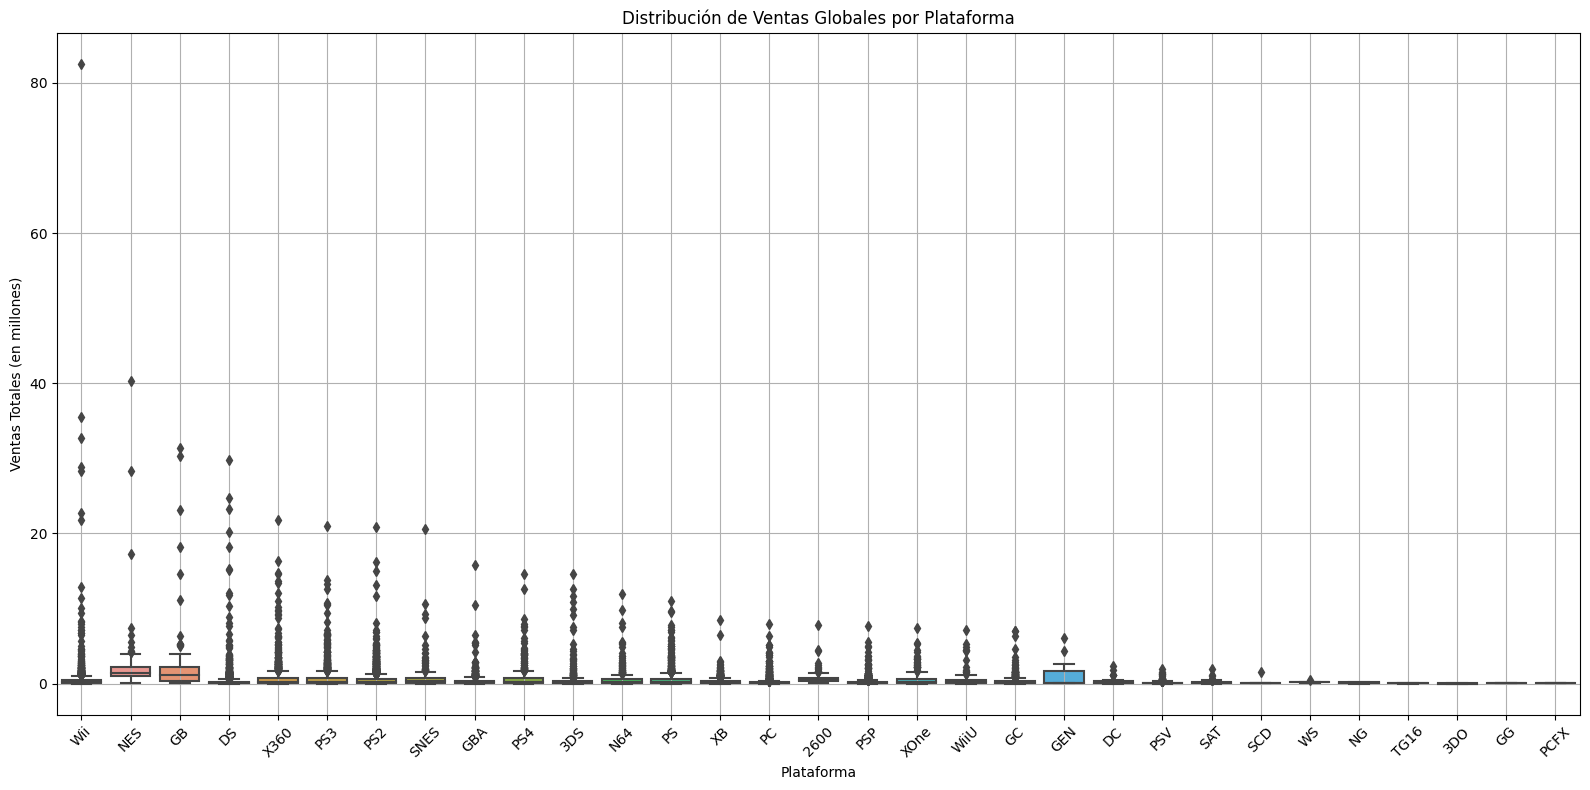

In [46]:
# Ajustar el tamaño del gráfico
plt.figure(figsize=(16, 8))

# Crear el diagrama de caja
sns.boxplot(x='platform', y='ventas_totales', data=df_g)

#plt.ylim(0, df_g['ventas_totales'].quantile(0.95))  # muestra hasta el percentil 95

# Títulos y etiquetas
plt.title('Distribución de Ventas Globales por Plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Ventas Totales (en millones)')

# Rotar etiquetas si hay muchas plataformas
plt.xticks(rotation=45)
plt.grid(True)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


Se realizan dos lecturas del histiograma por una parte observamos que hay muchísimos valores atípicos lo que quiere decir en cada plataforma hay un número de videojuegos que superan las espectativas de ventas, sin embargo, cabe señalar que representan menos del 25% de los videojuegos.

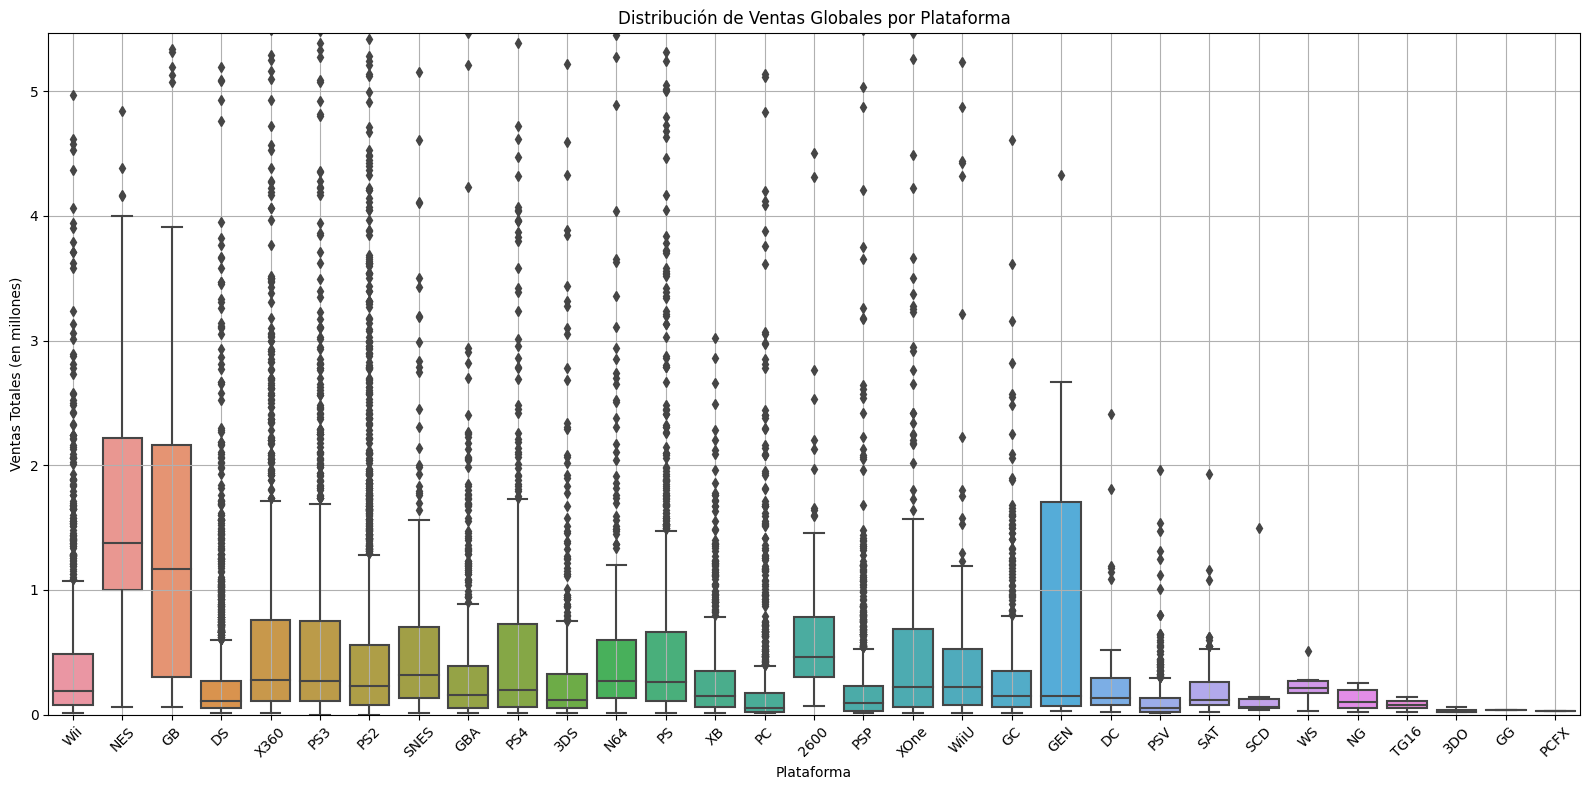

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ajustar el tamaño del gráfico
plt.figure(figsize=(16, 8))

# Crear el diagrama de caja
sns.boxplot(x='platform', y='ventas_totales', data=df_g)

# Opcional: limitar el eje Y para mejor visibilidad (por ejemplo, quitar outliers extremos)
plt.ylim(0, df_g['ventas_totales'].quantile(0.99))  # muestra hasta el percentil 95

# Títulos y etiquetas
plt.title('Distribución de Ventas Globales por Plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Ventas Totales (en millones)')

# Rotar etiquetas si hay muchas plataformas
plt.xticks(rotation=45)
plt.grid(True)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


En esta otra gráfica, se puede observar que la mayoría de lo de las plataformas están cargados positivamente a la derecha, y que la mayoría de las plataformas tienen al menos el 75% de sus videojuegos debajo del millón de ganancias, y son muy pocas plataformas con videojuegos en que el 75% de sus valores se encuentren debajo de los dos millones de ganancias.

De los diagramas de cajas se concluye que pese a ser una sector que genera mucho dinero la mayoría no comparten este éxito, sigue siendo rentable apesar de ello, por que el valor de media supera la mediana estructural.

- Mira cómo las reseñas de usuarios y profesionales afectan las ventas de una plataforma popular (tu elección). Crea un gráfico de dispersión y calcula la correlación entre las reseñas y las ventas. Saca conclusiones.
- Teniendo en cuenta tus conclusiones compara las ventas de los mismos juegos en otras plataformas.
- Echa un vistazo a la distribución general de los juegos por género ¿Qué se puede decir de los géneros más rentables? ¿Puedes generalizar acerca de los géneros con ventas altas y bajas?

Se elige la plataforma PS4. 

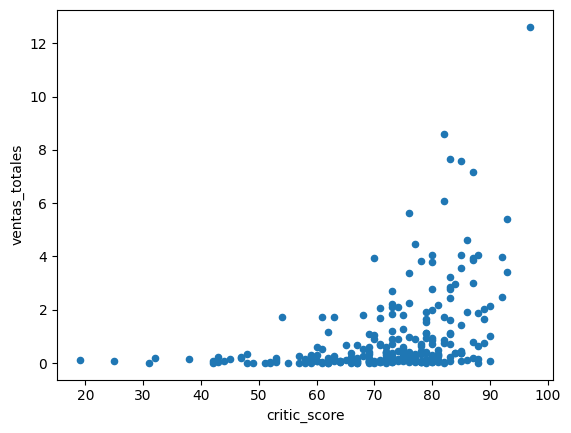

In [48]:
#Se crea un dataframe de solamente la plataforma PS4.
df_ps4_cs = df_g[df_g['platform'] =='PS4']
df_ps4_cs = df_ps4_cs[df_ps4_cs['critic_score'] !=0]
#Se crea un gráfico de dispersión entre las reseñas de criticos y las ventas.
df_ps4_cs.plot(x='critic_score', y='ventas_totales', kind= 'scatter')
plt.show()

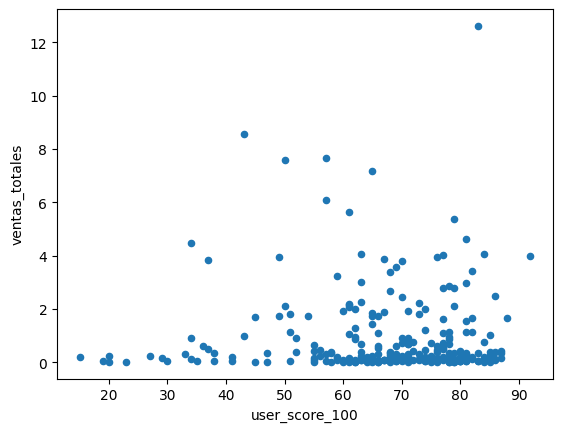

In [49]:
#Se crea un dataframe de solo la critica de los usuarios
user_score_df = df_g[df_g['platform'] =='PS4'].reset_index()
user_score_df['user_score_100'] = user_score_df['user_score']*10
user_score_df = user_score_df[(user_score_df['user_score_100'] !=0) & (user_score_df['user_score_100'] !=0.1)]
# Se hace una gráfica de dispersión entre las reseñas de usuarios y las ventas
user_score_df.plot(x='user_score_100', y='ventas_totales', kind= 'scatter')
plt.show()

In [50]:
#print(df_g)
#Se calcula la correlación entre las reseñas de críticos y las ventas.
print('Correlación entre las reseñas de críticos y las ventas totales.')
print(df_ps4_cs['critic_score'].corr(df_ps4_cs['ventas_totales']))
print()
print('Correlación entre las reseñas de usuarios y las ventas totales.')
print(user_score_df['user_score_100'].corr(user_score_df['ventas_totales']))

Correlación entre las reseñas de críticos y las ventas totales.
0.40656790206178095

Correlación entre las reseñas de usuarios y las ventas totales.
-0.03195711020455641


Del análisis de correlación positiva observamos que la opinión de los críticos es más significativa que la de los usuarios, lo cual nos hace evaluar la percepción  los juegos con grandes ventas son los mejor puntados por críticos para esta plataforma. Sin embargo 'la puntuación de un videojuego determina su venta' aún es una gran afirmación que debe de ser probada o refutada con más experimentos. 

Paso 4. Crea un perfil de usuario para cada región

Para cada región (NA, UE, JP) determina:

Las cinco plataformas principales. Describe las variaciones en sus cuotas de mercado de una región a otra.
Los cinco géneros principales. Explica la diferencia.
Si las clasificaciones de ESRB afectan a las ventas en regiones individuales.


In [51]:
print(df_g.columns)

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating',
       'ventas_totales'],
      dtype='object')


Crear df con las plataformas más vendidas no obsoletas.

In [52]:
up = df_g[df_g['platform'].isin(df_no_obs_platform)]

In [53]:
df_table_us = up.pivot_table(index='rating', columns= 'platform', values='na_sales', aggfunc='sum')
print(df_table_us)

platform    3DS     PC     PS3    PS4    PSP     Wii    X360   XOne
rating                                                             
E         32.24   7.71   73.62  16.76  28.66  276.74  114.26  14.40
E10+      12.51   2.85   34.14   9.02  20.48   95.20   61.19   9.00
EC          NaN   0.09     NaN    NaN    NaN    0.62     NaN    NaN
K-A         NaN   2.30     NaN    NaN    NaN     NaN     NaN    NaN
M          1.66  28.35  160.43  42.81  13.88    8.02  271.55  44.92
RP          NaN   0.00     NaN    NaN    NaN     NaN     NaN    NaN
T          6.73  33.52   99.26  16.38  35.08   71.68  124.09  10.17
unknown   30.35  19.71   26.04  23.77  11.07   44.64   31.38  14.63


In [54]:
df_table_eu = up.pivot_table(index='rating', columns= 'platform', values='eu_sales', aggfunc='sum')
print(df_table_eu)

platform    3DS     PC     PS3    PS4    PSP     Wii    X360   XOne
rating                                                             
E         24.30  13.72   64.83  27.56  14.43  151.75   50.36  10.46
E10+       7.87   6.43   24.91   8.80  13.63   48.99   26.77   4.03
EC          NaN   0.00     NaN    NaN    NaN    0.00     NaN    NaN
K-A         NaN   0.11     NaN    NaN    NaN     NaN     NaN    NaN
M          0.62  44.29  135.98  58.43   9.59    3.94  122.80  23.74
RP          NaN   0.08     NaN    NaN    NaN     NaN     NaN    NaN
T          3.67  48.44   69.34  18.31  17.47   28.26   48.59   5.06
unknown   25.02  29.37   35.23  27.99  11.56   29.27   22.24   8.30


In [55]:
df_table_jp = up.pivot_table(index='rating', columns= 'platform', values='jp_sales', aggfunc='sum')
print(df_table_jp)

platform    3DS    PC    PS3   PS4    PSP    Wii  X360  XOne
rating                                                      
E         21.80  0.00   8.05  0.84   3.15  40.09  1.00  0.04
E10+       4.53  0.00   0.99  0.67   2.54   4.10  0.17  0.03
EC          NaN  0.00    NaN   NaN    NaN   0.00   NaN   NaN
K-A         NaN  0.00    NaN   NaN    NaN    NaN   NaN   NaN
M          1.62  0.17  24.77  5.23   2.12   0.87  5.50  0.19
RP          NaN  0.00    NaN   NaN    NaN    NaN   NaN   NaN
T          6.99  0.00  25.51  2.97  18.24   7.88  3.62  0.03
unknown   65.73  0.00  20.87  6.25  50.73  16.39  2.14  0.05


In [56]:
gru_jp = df_g.groupby(['platform'])['jp_sales'].sum().sort_values()
print(gru_jp)

platform
2600      0.00
PCFX      0.03
GG        0.04
3DO       0.10
TG16      0.16
PC        0.17
XOne      0.34
SCD       0.45
XB        1.38
WS        1.42
NG        1.44
GEN       2.67
DC        8.56
X360     12.43
WiiU     13.01
PS4      15.96
GC       21.58
PSV      21.91
SAT      32.26
N64      34.22
GBA      47.33
Wii      69.33
PSP      76.78
PS3      80.19
GB       85.12
NES      98.65
3DS     100.67
SNES    116.55
PS2     139.20
PS      139.82
DS      175.57
Name: jp_sales, dtype: float64


Al analizar las cinco plataformas con mayores ganancias por región, encontramos lo siguiente:

Europa: PS2, PS3, X360, Wii y PS.

Norteamérica: X360, PS2, Wii, PS3 y DS.

Japón: DS, PS, PS2, SNES y 3DS.

Estos resultados permiten inferir ciertos patrones de preferencia regional:

En Europa, las consolas de Sony (PlayStation) dominan claramente el mercado, seguidas por su principal competidora, la Xbox 360, y la Wii, cuya propuesta de juego interactivo tuvo una recepción favorable. Esto sugiere una fuerte afinidad europea por las consolas tradicionales, con Sony como líder.

En Norteamérica, Xbox 360 supera a las consolas de Sony en términos de ganancias, lo que podría reflejar un mercado más joven o una estrategia de marketing más efectiva por parte de Microsoft. La presencia de Wii y DS en esta lista también sugiere una alta aceptación de consolas con formatos innovadores y portátiles, lo cual puede indicar una apertura del mercado estadounidense a experiencias de juego más accesibles y familiares.

En Japón, el panorama es muy diferente. Las plataformas más rentables incluyen consolas portátiles (DS, 3DS) y clásicos como la PS y SNES. La Xbox 360 no aparece entre las principales plataformas, lo que sugiere que el público japonés mantiene una fuerte fidelidad hacia marcas como Sony y Nintendo, y muestra una clara preferencia por las consolas portátiles, posiblemente por su estilo de vida más móvil y urbano.

Este análisis también se ve reflejado al observar cómo impactan las clasificaciones ESRB en las ventas. En Europa, las ganancias por clasificación están relativamente equilibradas, mientras que en Japón caen drásticamente a cifras de un solo dígito. Esto refuerza la idea de que el mercado oriental no invierte tanto en juegos de consola tradicionales —como los de la X360—, sino que se inclina más hacia experiencias portátiles. En este sentido, podríamos considerar a la Xbox 360 como un fenómeno occidental, mientras que el mercado japonés se mantiene más conservador y fiel a sus marcas locales.

Paso 5. Prueba las siguientes hipótesis:

— Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.
Hipotesis nula: No hay diferencia en las colificaciones promedio de los usuarios para las plataformas Xbox One y PC. 

Hipotesis alternativa: Son diferentes.


— Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.
Hipotesis nula: Las calificaciones promedio de los géneros de Acción y Deportes son las mismas.

Hipotesis alternativa: Las calificaciones promedio son diferentes.

Establece tu mismo el valor de umbral alfa.
5%

Explica:

— Cómo formulaste las hipótesis nula y alternativa.
Las hipótesis se formularon con base en el objetivo de determinar si existe una diferencia estadísticamente significativa entre los promedios de dos grupos. Primero se asume que no hay diferencia (hipótesis nula) y se busca evidencia suficiente para rechazarla en favor de la alternativa.

— Qué criterio utilizaste para probar las hipótesis y por qué.
Se aplicará una prueba de hipótesis bilateral (prueba de dos colas) en ambos casos, ya que el objetivo no es determinar si una media es mayor o menor que otra, sino simplemente si son diferentes.


Al realizar gráficas de cajas para estas dos plataformas podemos notar los outliers,  ayudan a identificar outliers que posteriomente en el desarrollo de las pruebas de hipótesis nos servirían eliminar para que no puedan sesgar nuestros resultados.

In [57]:
def eliminar_outliers_por_plataforma(df, columna_objetivo='ventas_totales'):
    """
    Elimina los outliers por grupo de 'platform' usando el método del IQR
    Parámetros:
    - df: DataFrame original
    - columna_objetivo: columna numérica sobre la que se eliminarán outliers (por defecto 'ventas_totales')
    Retorna:
    - DataFrame limpio sin outliers por plataforma
    """
    df_sin_outliers = pd.DataFrame()

    for plataforma, grupo in df.groupby('platform'):
        Q1 = grupo[columna_objetivo].quantile(0.25)
        Q3 = grupo[columna_objetivo].quantile(0.75)
        IQR = Q3 - Q1
        limite_inferior = Q1 - 1.5 * IQR
        limite_superior = Q3 + 1.5 * IQR

        grupo_filtrado = grupo[
            (grupo[columna_objetivo] >= limite_inferior) &
            (grupo[columna_objetivo] <= limite_superior)
        ]

        df_sin_outliers = pd.concat([df_sin_outliers, grupo_filtrado])

    return df_sin_outliers.reset_index(drop=True)


In [58]:
df_limpio = eliminar_outliers_por_plataforma(df_g)

In [59]:
df_limpio['user_score_100'] = df_limpio['user_score']*10
df_limpio_s = df_limpio[(df_limpio['user_score_100'] !=0) & (df_limpio['user_score_100'] !=0.1)]

In [60]:
print(df_limpio_s.columns)

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating',
       'ventas_totales', 'user_score_100'],
      dtype='object')


In [61]:
print(df_limpio_s['genre'].sort_values().unique())

['Action' 'Adventure' 'Fighting' 'Misc' 'Platform' 'Puzzle' 'Racing'
 'Role-Playing' 'Shooter' 'Simulation' 'Sports' 'Strategy']


In [62]:
usuarios_xbox_one= df_limpio_s[df_limpio_s['platform'] == 'XOne']['user_score_100']
usuarios_pc = df_limpio_s[df_limpio_s['platform'] == 'PC']['user_score_100']
usuarios_genre_accion= df_limpio_s[df_limpio_s['genre'] == 'Action']['user_score_100']
usuarios_genra_deportes= df_limpio_s[df_limpio_s['genre'] == 'Sports']['user_score_100']

Se realiza una prueba levene que revisa sus varianza.

In [63]:
from scipy.stats import levene

stat0, p0 = levene(usuarios_xbox_one, usuarios_pc)

print(f'Estadístico de Levene: {stat0}')
print(f'Valor p: {p0}')

alpha= 0.05

if p0 < alpha:
    print("Rechazamos la hipótesis nula, por lo tanto, hay una diferencia significativa.")
else:
    print("No se puede rechazar la hipótesis nula, por lo tanto, no hay diferencia significativa.")

Estadístico de Levene: 0.8530801313717294
Valor p: 0.3559585148254335
No se puede rechazar la hipótesis nula, por lo tanto, no hay diferencia significativa.


Esto nos indica que las varianzas no tiene diferencias significativas.

In [64]:
t_stat, p_val = st.ttest_ind(usuarios_xbox_one, usuarios_pc, equal_var=False)
print('Hipótesis 1: Xbox One vs PC')
print(f'Stadistico: {t_stat:.4f}, P-valor: {p_val:.4f}')

alpha= 0.05

if p_val < alpha:
    print("Rechazamos la hipótesis nula, por lo tanto, hay una diferencia significativa.")
else:
    print("No se puede rechazar la hipótesis nula, por lo tanto, no hay diferencia significativa.")

Hipótesis 1: Xbox One vs PC
Stadistico: -3.9194, P-valor: 0.0001
Rechazamos la hipótesis nula, por lo tanto, hay una diferencia significativa.


In [65]:
t_stat2, p_val2 = st.ttest_ind(usuarios_genre_accion, usuarios_genra_deportes, equal_var=False)

print("\nHipótesis 2: Acción vs Deportes")
print(f"T-statistic: {t_stat2:.4f}, P-valor: {p_val2:.4f}")

# Evaluación
if p_val2 < alpha:
    print("Rechazamos la hipótesis nula, por lo tanto, hay una diferencia significativa.")
else:
    print("No se puede rechazar la hipótesis nula, por lo tanto, no hay diferencia significativa.")


Hipótesis 2: Acción vs Deportes
T-statistic: 0.8300, P-valor: 0.4067
No se puede rechazar la hipótesis nula, por lo tanto, no hay diferencia significativa.


# Conclusión

 Se realizaron dos pruebas de hipótesis con un nivel de significancia del 5% para evaluar si existen diferencias significativas en las calificaciones promedio otorgadas por los usuarios, tanto entre plataformas como entre géneros.

 1. Comparación entre plataformas Xbox One vs PC
La hipótesis nula establecía que las calificaciones promedio de los usuarios para Xbox y PC son iguales, mientras que la hipotesis alternativa proponía que son diferentes.

Resultado: El valor p obtenido fue menor al umbral alfa (0.05) por lo que se rechaza la hipótesis nula. Esto indica que hay evidencia estadísticamente significativa para afirmar que las calificaciones promedio de los usuarios no difieren entre Xbox One y PC. En otras palabras, los usuarios no califican los juegos de manera similar en ambas plataformas.

2. Comparación entre géneros: Acción vs deportes
La hipótesis nula planteaba que las calificaciones promedio de los géneros Acción y Deportes son iguales, mientras que la alternativa indicaba que son diferentes.

Resultado: El valor p fue mayor a 0.05 por lo tanto, no se rechaza la hipótesis nula. Esto sugiere que no existe una diferencia significativa en las calificaciones promedio otorgadas por los usuarios a juegos del género Acción frente a los del género Deportes.

Estos resultado nos permiten concluir que, si bien el tipo de plataforma (Xbox One o PC) influye significativamente en la forma en que los usuarios califican los juegos, el género no tiene un impacto notable. Por tanto, al analizar el comportamiento del usuario o diseñar estrategías de marketing, podría ser más relevante enfocarse en el tipo de plataforma (Xbox y PC) que en el género de lanzamiento, al menos en términos de percepción y valoración del público.